# In class 3

### Index-based for loops

#### range()

Can be used with 1, 2 or 3 arguments. Check examples below.

In [ ]:
# What does it do

# with one argument
# starts from 0 to 9 (10-1)
list(range(10))


In [ ]:
# with 2 arguments
# start, stop
list(range(3,10)) # from 3 to 10

In [ ]:
# with 3 arguments
# start, stop, step
list(range(3,10,2)) # from 3 to 10 with step of 2

Range is very often used with one input, the length of the list over whose indices we'd like to iterate. For this we use the len() function as illustrated below.

In [ ]:
word = 'BERLINALE'

# goes over the the indices of word (a string) and prints the index and the letter at that index
for i in range(len(word)):
    print(i, word[i])

In [ ]:
# does the same as above using enumerate
for i, letter in enumerate(word):
    print(i, letter)

In [ ]:
# another solution to find maximum
B = [1, 4, 6, 7, 89, 54]

# define the biggest index as the first one
# we need it so that we can compare to something
big_indx = 0

# loop over all indices 0 to length of the list
for i in range(len(B)):
    # if the value at index i is bigger than the biggest value until now
    if B[i] > B[big_indx]:
        # update my index for the biggest value
        big_indx = i

print('The max value in B is', B[big_indx], 'found on position' , big_indx)

User scenario. We have double measurements for how much time a mouse spent eating. From the variable double_measurement 30 and 40 belong to mousse1, 50, 48 to mouse 2, etc. 

We want to just take the first measurement. 

In [ ]:
# percentage of time spent in center

double_measurements = [30, 40, 50, 48, 23, 19, 60, 54, 39, 27] # 5 animals
# we define an emty list where to store our single measurement
one_measurement_per_animal = []

# loop over the indices of the double_measurement with a step of 2
for indx in range(0, len(double_measurements), 2): 
    # append the measuremnt at that index
    one_measurement_per_animal.append(double_measurements[indx])

print(one_measurement_per_animal)


How would you take only the second measurement? You need to change only one number in the cell above.

In [ ]:
# your code here

How would you take the average from the two measurements? 

Hint: you can index like this A[3+1]

In [ ]:
# your code here

#### enumerate()

- assigns a count to each item within an iterable and returns it as an enumerate object
- one way to avoid nested loops

In [ ]:
import numpy as np

# create a numpy array with values from 20 to 24
# Notice that 25 is not included in the array, same principle as range
array_a = np.arange(20, 25)
print('Our starting array is:', array_a)

# loop over the index and the values of the array and print them
for indx, val in enumerate(array_a):
    print('the index is', indx)
    print('the value is ', val)

Remember that both range() and enumerate() are returning objects. To look at what they will actually be, you could create a list and look at the output. 

This is here just to help you understand what range() and enumerate() are doing. You will probably never need to create a list like the ones below.

In [ ]:
# check the types
print(type(range(20)))

fruits = ['apple', 'peach', 'tomato', 'grape']
print(type(enumerate(fruits)))

In [ ]:
# a way to see what will be output
list(enumerate(array_a))
list(range(len(array_a)))

In [ ]:
# this is here just to show you that you can loop over lists with strings
fruits = ['apple', 'peach', 'tomato', 'grape']

for indx, fruit in enumerate(fruits):
    print(indx)
    print(fruit)

### In-class exercise

Given:
4 measurements of intrinsic properties of 12 cells <br>
4 numpy arrays Rin (input resistance), Rs (series resistance), RMPs (resting membrane potential), AP_THs (action potential threshold)

Find:
1. The input resistance of the cell with the lowest series resistance
2. The AP thresholds of the 2 cell with highest RMPs
3. A list of indices of cells to exclude. QC criteria: 
    - Rs < 30 MOhm and
    - RMPs > -45 mV


In [15]:
Rin = np.array([26.38, 67.84, 63.05, 58.88, 57.51, 57.88, 43.68, 64.03, 139.82, 60.39, 62.13, 63.04])
Rs = np.array([19.61, 28.40, 13.71, 16.26, 9.78, 10.51, 12.41, 8.94, 12.29, 11.92, 15.66, 16.32])
RMPs = np.array([-68.93, -72.71, -55.55, -58.70, -44.18, -75.16, -43.82, -80.47, -63.30, -39.27, -46.08, -32.97])
AP_THs = np.array([-47.45, -28.71, -36.14, -44.54, -38.67, -41.49, -41.99, -43.81, -44.21, -46.93, -42.58, -27.12])

In [ ]:
indx_lowest_Rs = 0
min_Rs = Rs[indx_lowest_Rs]

# loops over the indices and values of the series resistance list (Rs)
for indx, Rs_val in enumerate(Rs):
    # check if the Rs_val is smaller than the min_Rs until now
    if Rs_val < min_Rs:
        # if yes, updates the lowest index
        indx_lowest_Rs = indx
        # also updete the min_Rs
        min_Rs = Rs_val
        
# find the corresponding input resistance value
Rin[indx_lowest_Rs]


In [ ]:
# very fast way to solve, using functions from the numpy package
indx_low_Rs = np.where(Rs == np.amin(Rs))[0][0]
print(Rin[indx_low_Rs])

# broken down version 
# find the minimum
min_Rs = np.amin(Rs)
# find where Rs is equal to the minimum
# we are using [0][0] to get the index
indx_low_Rs = np.where(Rs == min_Rs)[0][0]

print(Rin[indx_low_Rs])

Summary of what solution strategies were proposed in class. Illustration that there's more than one way to skin a cat. Many roads lead to Rome. Idioms are great.

All solutions start with finding the maximum. Then (options)
1. find the maximum; find the second maximum in a for loop with the condition that the value should not be equal the first max value
2. find the maximum; createa new array where this value is removed, find the maximum in the same way. this will be the second biggest value
3. sort the values, create max_val and max_val2 by indexing the sorted value, loop over the orignial array with enumerate to find the indices of those values
4. (too advanced) create a matrix with all cell parameters and work with this and 

Solutions 1 to 3 are illustrated below. Break them apart. Play with the code and make sure you understand what each line is doing.

In [ ]:
# solution 2.1
# find max 
max_RMP = np.amax(RMPs)
# loop to find the index of max values
for i, val in enumerate(RMPs):
    # if the value is equal to found max 
    if val == max_RMP:
        # update index of max value
        indx_max = i

# finding the  2nd max value
second_max_indx = 0
second_max_RMP = RMPs[second_max_indx]

for i, RMP_val in enumerate(RMPs):
    # condition that it's not 
    if RMP_val > second_max_RMP and RMP_val != max_RMP:
        second_max_indx = i
        second_max_RMP = RMP_val
        

In [ ]:
# execute this cell 
A = [2,3,4,5]
A[:-1]
# what does this notation do A[:-1]?

In [ ]:
# solution 2.2 

# find max 
max_RMP = np.amax(RMPs)
# loop to find the index of max values
for i, val in enumerate(RMPs):
    # if the value is equal to found max 
    if val == max_RMP:
        # update index of max value
        indx_max = i

# removing the max_val
# if indx_max is last, then we keep RMPs from 0 to len(RMPs) - 1 - this is done like this RMPs[:-1]
if indx_max + 1 == len(RMPs) - 1: # if last
    RMPs_no_max = RMPs[:-1]
elif indx_max == 0: # if the max value is in position 0
    RMPs_no_max = RMPs[1:] # RMPs without first value
else: # if max value is somewhere inside the array
    RMPs_no_max = np.concat([RMPs[:indx_max], RMPs[indx_max+1:]]) # concatinate RMPs up to the max index and the ones after

print(RMPs_no_max)

# do the same as before to find the max in RMPs_no_max
max_RMP2 = np.amax(RMPs_no_max)
for i, val in enumerate(RMPs_no_max):
    if val == max_RMP2:
        indx_max_2 = i

# see whether we need to add 1 to the indx_max_2
if indx_max < indx_max_2: # if the max_val is before max_val2, then to index max_val2 in the original array, 
    # we'd need to add 1 to it, correcting for the RMP_max val that we removed
    indx_max_2 = indx_max_2 + 1 


In [ ]:
# solutions 3 - sorting 

RMPs_sorted = sorted(RMPs) # sorts the list from smallest to biggest 
RMP_max, RMP_max_2 = RMPs_sorted[-1], RMPs_sorted[-2] # take last and for-to-last value

for i, resting in enumerate(RMPs):
    if resting == RMP_max:
        indx_max = i
    if resting == RMP_max_2:
        indx_max_2 = i

In [ ]:
# alternative and preffered way instead of a for loop
# remember those are only exxercises in real life we would like to use functions that already exist
# they are faster and there's no need for us to reinvent the wheel

RMPs_sorted = sorted(RMPs) # sorts the list from smallest to biggest 
RMP_max, RMP_max2 = RMPs_sorted[-1], RMPs_sorted[-2]

indx_max = np.where(RMPs == RMP_max)[0][0]
indx_max_2 = np.where(RMPs == RMP_max2)[0][0]

# using or | and two conditions at the same time
# indx_max, indx_max_2 = np.where((RMPs == RMP_max) | (RMPs == RMP_max2))[0][0]


In [ ]:
indx_max, indx_max_2 = np.where((RMPs == RMP_max) | (RMPs == RMP_max2))[0]

In [ ]:
# very clean solution 

min_to_max_indices = np.argsort(RMPs)
TH1, TH2 = AP_THs[min_to_max_indices[-1]], AP_THs[min_to_max_indices[-2]]

What does np.argsort do? Explain in your own words.

### Solution for 3. 

Find a list of indices of cells to exclude. QC criteria: 
    
    - Rs < 30 MOhm and
    - RMPs > -45 mV

In [42]:
# now it's your turn. solve the last remaining problem in the cell below



## break and continue

- break - immediately terminates the loop
- continue - skips whatever is after it in the for loop and continues with the next iteration
    - mostly used after a conditional statement

In [ ]:
# break statement
 
fruits = ['apple', 'peach', 'tomato', 'grape', 'pear', 'apricot']

not_the_best_fruit = []
for indx, fruit in enumerate(fruits):
    if fruit == 'pear':
        print('we have found the tastiest fruit. It is', fruit)
        break
    
    not_the_best_fruit.append(fruit)

print('The not so tasty fruit are:', not_the_best_fruit)

In [ ]:
# continue statement        

fruits = ['apple', 'peach', 'tomato', 'grape', 'pear', 'apricot']

not_the_best_fruit = []
for indx, fruit in enumerate(fruits):
    if fruit == 'tomato':
        print('we have found the tastiest fruit. It is', fruit)
        continue
    not_the_best_fruit.append(fruit)

print('The not so tasty fruit are:', not_the_best_fruit)

### Exercise with break and continue statements

Given: a dictionary with slice names and the recordings that were performed. Some times recordings were repeated. You would like to keep only the first instances of those recordings and expand the dictionary with the indices of the recordings to keep. Use a continue statement to solve this problem.

In [2]:
# Given

import numpy as np

recordings_dictionary = {
        'S1': ['vc', 'ramp', 'resting', 'resting', 'connectivity_screen', 'spontan', 'vc_end'],
        'S2': ['vc', 'ramp', 'resting', 'connectivity_screen', 'connectivity_screen' ,'spontan', 'vc_end'],
        'S3': ['vc', 'ramp', 'resting', 'resting', 'connectivity_screen', 'spontan', 'spontan', 'vc_end'],
        'S4': ['vc', 'ramp', 'ramp', 'ramp', 'resting', 'connectivity_screen', 'spontan', 'vc_end']
}

In [1]:
# solution should look like this

recordings_dictionary_solution = {
        'S1': [['vc', 'ramp', 'resting', 'connectivity_screen', 'spontan', 'vc_end'], [0,1,2,4,5,6]],
        'S2': [['vc', 'ramp', 'resting', 'connectivity_screen', 'spontan', 'vc_end'], [0,1,2,3,5,6]],
        'S3': [['vc', 'ramp', 'resting', 'connectivity_screen', 'spontan', 'vc_end'], [0,1,2,4,5,7]],
        'S4': [['vc', 'ramp', 'resting', 'connectivity_screen', 'spontan', 'vc_end'], [0,1,4,5,6,7]]
}

In [5]:
# your solution here

recordings_dictionary_solution_1 = {}

# looping through the items
for key in recordings_dictionary.keys():

    unique_values, indices_unique = [], []
    # looping through the values of dict[key]
    for i, value in enumerate(recordings_dictionary[key]):
        # if values not the values already
        if value not in unique_values:
            # append it
            unique_values.append(value)
            indices_unique.append(i)
    # define a new dictionary with the same keys and unique protocol names, and their indices
    recordings_dictionary_solution_1[key] = [unique_values, indices_unique]

recordings_dictionary_solution_1

{'S1': [['vc', 'ramp', 'resting', 'connectivity_screen', 'spontan', 'vc_end'],
  [0, 1, 2, 4, 5, 6]],
 'S2': [['vc', 'ramp', 'resting', 'connectivity_screen', 'spontan', 'vc_end'],
  [0, 1, 2, 3, 5, 6]],
 'S3': [['vc', 'ramp', 'resting', 'connectivity_screen', 'spontan', 'vc_end'],
  [0, 1, 2, 4, 5, 7]],
 'S4': [['vc', 'ramp', 'resting', 'connectivity_screen', 'spontan', 'vc_end'],
  [0, 1, 4, 5, 6, 7]]}

## Homework

Objectives:
- Play with python. There will be quite a few new things. We try to recreate a real-life situation, when someone else has given you their code that you need to use.
- try to understand someone else's code. Don't worry, we've provided comments
- Practice with for loops

required packages: matplotlib, json, numpy

We will be working with a dictionary containing data from two days. 'D1' and 'D2' are the dictionary keys (look at lesson 1, for a refresher on dictionaries). 

For each day there are cell characterization traces in response to current injections steps (in pA) -300, -200, -150, -100, -50, 0, 50, 100, 150, 200, 250, 300, stored in the *inj* variable. There are 12 sweeps, meaning also 12 injection steps.

In [6]:
# importing packages
import matplotlib.pyplot as plt
import json
import numpy as np

In [7]:
# Run this cell, required so that you are able to load the data. no need to understand them for now

# Custom JSON decoder to handle lists and convert them back to NumPy arrays
def json_numpy_obj_hook(dct):
    '''
    Decodes a JSON object and converts lists back to NumPy arrays.

    Args:
        dct (dict): The JSON object.

    Returns:
        dict: The decoded JSON object with lists converted to NumPy arrays.
    '''
    for key, value in dct.items():
        if isinstance(value, list):
            try:
                dct[key] = np.array(value)
            except ValueError:
                pass
    return dct

# Function to read a JSON file and convert lists back to NumPy arrays
def read_dict_from_text_file(file_path: str):
    '''
    Reads a JSON file and converts lists back to NumPy arrays.

    Args:
        file_path (str): The path to the input JSON file.

    Returns:
        dict: The dictionary with lists converted to NumPy arrays.
    '''
    with open(file_path, 'r') as file:
        dictionary = json.load(file, object_hook=json_numpy_obj_hook)
    return dictionary

Loading the characterization dictionary. They keys of the dictionary are 'D1' and 'D2'. Try to access the data from the dictionary.
Do you have any idea what it is?

In [9]:
# change the file path to where your charact_dict is located

file_path = '/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/code/schmitzlab_python/data/charact_data.json'
# load your characterization dictionary
charact_dict = read_dict_from_text_file(file_path)

inj = [-300, -200, -150, -100, -50, 0, 50, 100, 150, 200, 250, 300]

In [10]:
# play field

charact_dict

{'D1': array([[-61.36474609, -61.35253906, -61.31591797, ..., -59.21630859,
         -59.20410156, -59.23461914],
        [-60.08911133, -60.19897461, -60.16235352, ..., -58.28857422,
         -58.27026367, -58.19702148],
        [-59.79003906, -59.75952148, -59.82666016, ..., -59.14306641,
         -59.13085938, -59.04541016],
        ...,
        [-60.69335938, -60.72998047, -60.70556641, ..., -60.80322266,
         -60.79711914, -60.81542969],
        [-60.00366211, -59.97314453, -59.89990234, ..., -58.66699219,
         -58.7097168 , -58.6730957 ],
        [-58.12988281, -58.17871094, -58.19091797, ..., -60.51025391,
         -60.47363281, -60.46142578]], shape=(12, 27500)),
 'D2': array([[-61.10839844, -61.07788086, -61.03515625, ..., -59.79614258,
         -59.81445312, -59.86938477],
        [-59.91821289, -59.92431641, -59.88769531, ..., -60.51025391,
         -60.53466797, -60.546875  ],
        [-60.93139648, -60.89477539, -60.82763672, ..., -59.91210938,
         -59.9609375

Let's try to inspect the data.

What type is it?

How is it structured?

What do the rows and the columns correspond to?

In [11]:
# what is the type of the data
type(charact_dict)

dict

In [13]:
# how to access the data and what is its shape
# separate by days
data_day1 = charact_dict['D1']
data_day2 = charact_dict['D2']

# type of data inside the dictionary
print(type(data_day1))

# what's the shape of the data?
# the output gives (number of rows, number of columns)
# the number of rows corresponds to the number of sweeps and the columns are the number of datapoints
print(np.shape(data_day1))

<class 'numpy.ndarray'>
(12, 27500)


Now that we have some more information, in your own words, try to explain the data structure. 
- What is charact_dict?
- What type of data does it contain?
- How is the data structured?

##### Let's visualize it. 

No need to understand the code for plotting. You just have to understand how to apply functions. Again material from lecture 1.

In [14]:
# plotting the all the sweeps. No need to understand this function

def plot_all_sweeps(charact_dict):
    '''
    Plots all sweeps for two recordings (D1 and D2) from a given characteristic dictionary.
    Arguments:
    charact_dict (dict): A dictionary containing two keys 'D1' and 'D2', each associated with a 2D numpy array.
                         The arrays should have sweeps as rows and data points as columns.
    The function creates a figure with two subplots:
    - left subplot shows the sweeps for 'D1', right subplot shows the sweeps for 'D2'
    '''
    
    sampling_rate = 20 # in kHz
    all_swps = np.shape(charact_dict['D1'])[0]
    swp_len_ms = np.shape(charact_dict['D1'])[1] / sampling_rate
    x = np.linspace(0, swp_len_ms, len(charact_dict['D1'][0,:]))
    fig, ax = plt.subplots(1, 2, figsize = (12,5))

    for i in range(all_swps):
        ax[0].plot(x, charact_dict['D1'][i,:], color = plt.cm.Oranges(np.linspace(1, 0.25, all_swps))[i])
        ax[1].plot(x, charact_dict['D2'][i,:], color = plt.cm.Greens(np.linspace(1, 0.25, all_swps))[i])

    ax[0].set_title('Recording D1')
    ax[0].set_xlabel('ms')
    ax[0].set_ylabel('mV')

    ax[1].set_title('Recording D2')
    ax[1].set_xlabel('ms')
    ax[1].set_ylabel('mV')
    plt.show()

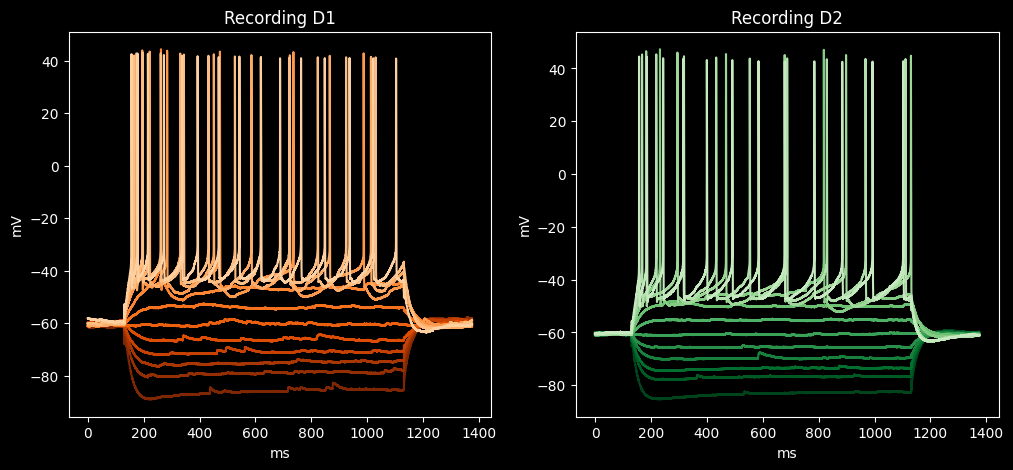

In [15]:
plot_all_sweeps(charact_dict)

##### some more plotting and a reminder about functions and doc strings

Below we've provided a function that plots a specific sweep number from D1 and D2

- What are the functions' parameters?
- which one is predefined?

Below apply the function to plot different sweeps. 
Read the docstring. 
- How can you break this function?
- what type of error did you receive?

In [22]:
def plot_specific_swp_num(charact_dict, swp_num1, swp_num2,
                           inj = [-300, -200, -150, -100, -50, 0, 50, 100, 150, 200, 250, 300]):
    '''
    Plots a sweep from day 1 and day 2.

    Arguments:
    charact_dict (dict): Dictionary with cell characterization data from 2 days.
                         Should contain keys 'D1' and 'D2' with corresponding data.
    swp_num1 (int): Sweep number, ranging from 0 to 11, from day 1 to plot
    swp_num2 (int): Sweep number, ranging from 0 to 11, from day 2 to plot.
    inj (list, optional): List of current steps in pA. Default is 
                          [-300, -200, -150, -100, -50, 0, 50, 100, 150, 200, 250, 300].

    Returns:
    None
    '''

    if not isinstance(swp_num1, int) or not isinstance(swp_num2, int) or \
        not isinstance(charact_dict, dict):
        return 'Not possible. Are you trying to break me?'

    if swp_num1 > 11 or swp_num2 > 11:
        return 'Not possible. Only 12 sweep available'
    
    sampling_rate = 20 # in kHz
    all_swps = np.shape(charact_dict['D1'])[0]
    swp_len_ms = np.shape(charact_dict['D1'])[1] / sampling_rate
    x = np.linspace(0, swp_len_ms, len(charact_dict['D1'][0,:]))
    fig, ax = plt.subplots(1, 2, sharey = True, figsize = (12,5))

    ax[0].plot(x, charact_dict['D1'][swp_num1,:], color = plt.cm.Oranges(np.linspace(1, 0.25, all_swps))[swp_num1])
    ax[1].plot(x, charact_dict['D2'][swp_num2,:], color = plt.cm.Greens(np.linspace(1, 0.25, all_swps))[swp_num2])

    ax[0].set_title('Sweep number '+ str(swp_num1) +' from D1\n'\
                    'current step of ' + str(inj[swp_num1]) + ' pA')
    ax[0].set_xlabel('ms')
    ax[0].set_ylabel('mV')

    ax[1].set_title('Sweep number '+ str(swp_num2) +' from D2\n'\
                    'current step of ' + str(inj[swp_num2]) + ' pA')
    ax[1].set_xlabel('ms')
    ax[1].set_ylabel('mV')
    ax[1].yaxis.set_tick_params(labelleft=True)

    plt.show()

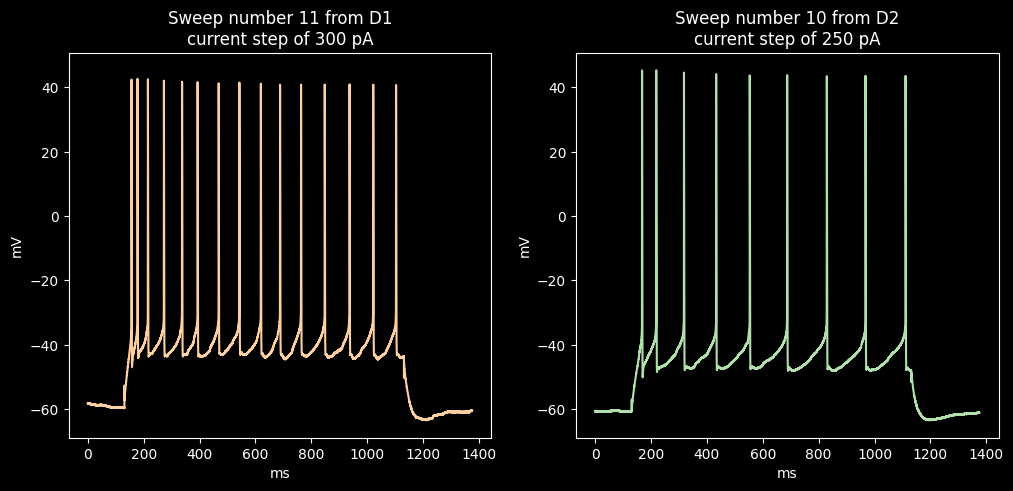

In [18]:
# try out the function with different sweeps

plot_specific_swp_num(charact_dict, 11, 10)

IndexError: index 30 is out of bounds for axis 0 with size 12

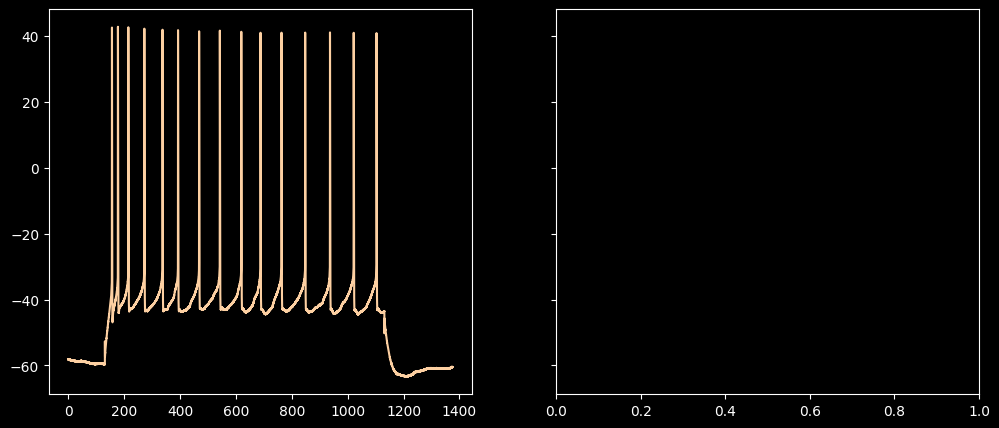

In [24]:
# try to break the function without changing it

plot_specific_swp_num(charact_dict,  -1, 30)

In [24]:
# take a look at the function. Do you have an idea what you could change in the first 10 lines so that it is breakable?

Apply the function to plot the first sweep, with injection -300 pA. Plot the last sweeps for both days.

In [ ]:
# your code here 

### Play with the data

Find the membrane potentials for both day's, when the injected current is 0. 

First, we need to find when the injection is 0. Then 'isolate' this sweep from the data, then calcualte the mean or the median of that sweep.

In [32]:
# find the index when the injected current is 0. Use a for loop and a break statement
inj = [-300, -200, -150, -100, -50, 0, 50, 100, 150, 200, 250, 300]
inj_array = np.array(inj)


indx_0 = np.where(inj_array == 0)[0][0]
print(indx_0)


5


In [33]:
np.shape(np.shape(charact_dict['D1']))

(12, 27500)

In [ ]:
# This is how you access the data for sweep 10
# first give the key for the day you are inteerested in
# then index the sweep number (from 0 to 11), which you want to 'isolate'
# this is called indexing
# you are telling the computer give me the data from row 10, over all columns (:)
# : - means all. translates to from 0 to len-1
# if you index [10, 300:4000], they you are plotting sweep 10 from datapo

data_D1_sweep_10 = charact_dict['D1'][10, :]

In [35]:
np.shape(charact_dict['D1'][5, :])

(27500,)

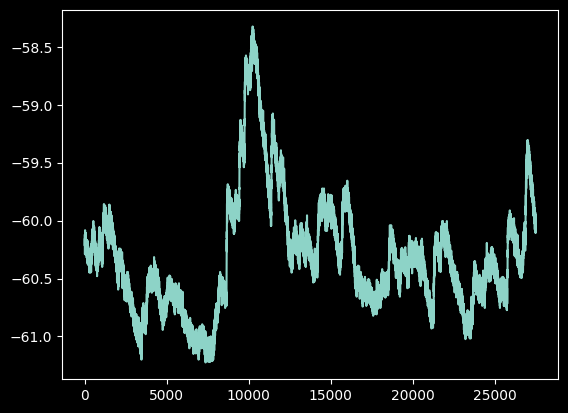

In [39]:
# easiest way to visualize
plt.plot(charact_dict['D1'][5, :])
plt.show()

# what is plotted below
# can you plot sweep 3, from datapint 4000 to 23000


In [40]:
# take the data from sweep where the injected current is 0 

data_D1_0_current = charact_dict['D1'][5, :]
data_D2_0_current = charact_dict['D2'][5, :]

resting_D1 = np.mean(data_D1_0_current)
resting_D2 = np.mean(data_D2_0_current)

# using the median
resting_D1 = np.median(data_D1_0_current)
resting_D2 = np.median(data_D2_0_current)

In [ ]:
charact_dict[key]

#### Find the first spiking sweep

Think about what do you need to loop over to find the first spiking sweep. What condition would you put, to call a sweep spiking? Plot the traces and observe the signal.

In [45]:
# your code here

first_spiking_sweep = {}

for key in charact_dict.keys():
    for i, sweep in enumerate(charact_dict[key]):
        # code
        if np.max(sweep) > 0:
            first_spiking_sweep[key] = i
            break


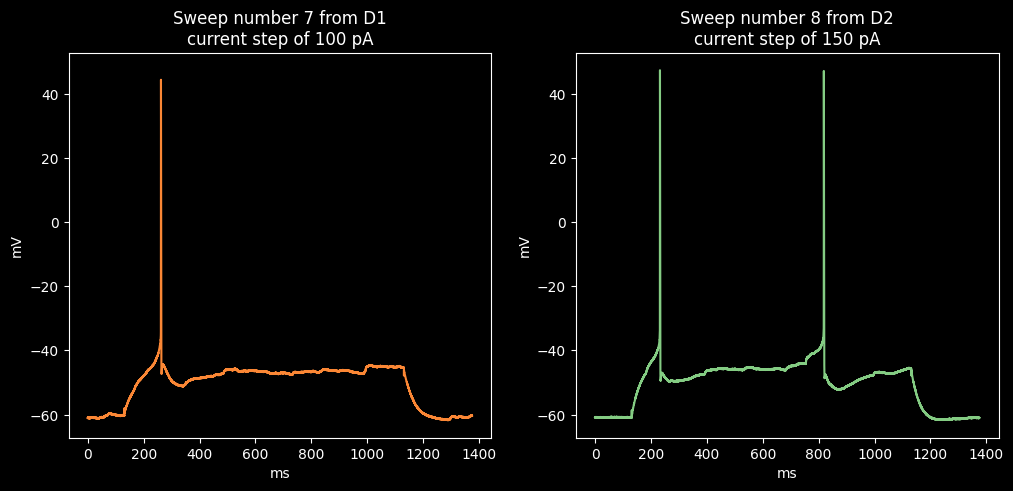

In [46]:
plot_specific_swp_num(charact_dict,  first_spiking_sweep['D1'], first_spiking_sweep['D2'])

#### Think about errors

You've reached the end. Congratulations!

What were some errors that you encountered while completing the homework? How did you deal with them?